## **I. Perkenalan**


**Batch**: CODA-RMT-008

**Judul**: Analisis Penargetan Subsidi Kendaraan Listrik (EV) untuk Mendorong Adopsi yang Merata di Seluruh County Berdasarkan Faktor Sosio-Ekonomi

## **II. Identifikasi Masalah**


#### **Latar Belakang**
Pemerintah memiliki tujuan untuk mempercepat adopsi kendaraan listrik (EV) sebagai bagian dari komitmen terhadap Tujuan Pembangunan Berkelanjutan (SDGs) PBB, khususnya Goal 7 (Energi Bersih), Goal 11 (Kota Berkelanjutan), dan Goal 13 (Aksi Iklim). Namun, data saat ini menunjukkan bahwa penyebaran EV tidak merata, dengan beberapa wilayah (county) yang tertinggal jauh. Diduga, faktor sosio-ekonomi seperti Upah Minimum Regional (UMR) dan karakteristik wilayah seperti kepadatan penduduk menjadi penghalang utama.

Analisis ini bertujuan untuk mengidentifikasi wilayah-wilayah dengan tingkat penetrasi EV yang rendah, memahami hubungannya dengan faktor ekonomi, dan merekomendasikan model-model EV yang paling cocok untuk disubsidi di wilayah tersebut. Dengan demikian, program subsidi pemerintah dapat menjadi lebih tepat sasaran, efektif, dan mendorong adopsi yang lebih merata.

### **Problem Statements**
Penyebaran kendaraan listrik (EV) di Indonesia masih belum merata, dengan beberapa county menunjukkan tingkat penetrasi EV yang rendah. Kondisi ini diduga dipengaruhi oleh faktor sosio-ekonomi seperti rendahnya Upah Minimum Regional (UMR) serta karakteristik wilayah seperti kepadatan penduduk. Tanpa analisis yang tepat, kebijakan subsidi pemerintah berisiko tidak efektif dan tidak tepat sasaran. Oleh karena itu, perlu dilakukan identifikasi wilayah dengan penetrasi EV rendah, analisis hubungan dengan faktor ekonomi, serta rekomendasi model EV yang paling sesuai untuk disubsidi agar program pemerintah dapat lebih adil, efisien, dan mendorong adopsi EV secara merata.

#### **Defining the Problem Statement (Kerangka SMART)**
* **Specific**: Mengidentifikasi county dengan tingkat penetrasi EV (jumlah EV per kapita) rendah. Menganalisis karakteristik UMR dan kepadatan penduduknya, lalu merekomendasikan model EV yang terjangkau dan populer di wilayah lain dengan karakteristik serupa sebagai target subsidi.

* **Measurable**: Mengukur tingkat penetrasi EV, rata-rata UMR, kepadatan penduduk, serta pangsa pasar dan harga dari model-model EV yang relevan.

* **Achievable**: Analisis dapat dicapai menggunakan empat dataset yang disediakan (EV Population, UMR, Harga Mobil, Populasi Total) dan library Python dalam waktu yang ditentukan.

* **Relevant**: Hasil analisis akan memberikan rekomendasi langsung yang dapat digunakan untuk merancang kebijakan subsidi yang lebih efektif dan adil, mendukung SDG 10 (Mengurangi Kesenjangan) selain tujuan lingkungan.

* **Time-Bound**: Analisis diselesaikan sesuai timeline proyek untuk memberikan masukan kebijakan yang relevan.

#### **Key Questions**
1. ⁠Bagaimana distribusi, tendensi sentral, dispersi (sebaran), dan outlier pada data numerik kunci: Harga Mobil, Jangkauan Listrik (Electric Range), UMR, dan Kepadatan Penduduk?

2. ⁠Bagaimana tingkat penetrasi EV di tiap county jika dibandingkan dengan total populasi, dan sejauh mana tingkat UMR di wilayah tersebut memengaruhi keterjangkauan EV?

3. ⁠Model EV apa yang paling banyak diminati, berapa harganya, dan sejauh mana harga tersebut sebanding dengan pendapatan tahunan masyarakat?

4. Selain UMR, faktor-faktor apa yang paling mempengaruhi penetrasi EV di tiap county?

5. Apakah EV yang dibeli di county dengan UMR tinggi memiliki electric range (jarak tempuh) lebih besar dibandingkan EV yang dibeli di county dengan UMR rendah?

## **iii. Data Loading**


In [2]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

# Mengatur style visualisasi
sns.set_style('whitegrid')

In [3]:
# Memuat semua dataset yang dibutuhkan
ev_df = pd.read_csv('ev_final.csv')
ump_df = pd.read_csv('county_umr.csv') 
harga_df = pd.read_csv('car_models_prices_final.csv')
populasi_df = pd.read_csv('total_populasi_per_county.csv')

print("Semua dataset berhasil dimuat.")

Semua dataset berhasil dimuat.


## **IV. Data Cleaning & Merging**
Pada tahap ini, kita akan membersihkan setiap dataset dan menggabungkannya menjadi satu DataFrame utama untuk analisis.


In [20]:
import pandas as pd

# Pembersihan & Persiapan Data

# Fungsi untuk menstandarkan nama kolom (lowercase, ganti spasi/titik dengan underscore)
def standardize_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '')
    return df

# Standarkan semua DataFrame
ev_df = standardize_columns(ev_df)
harga_df = standardize_columns(harga_df)
ump_df = standardize_columns(ump_df)
populasi_df = standardize_columns(populasi_df)

# Mengubah nama kolom spesifik agar seragam untuk merging
ev_df.rename(columns={'model': 'model', 'county': 'county', 'vin_(1-10)': 'vin'}, inplace=True)
harga_df.rename(columns={'price_2025': 'price'}, inplace=True)
ump_df.rename(columns={'value': 'min_wage'}, inplace=True)  
populasi_df.rename(columns={'pop_2025': 'population'}, inplace=True)

# Menyeragamkan format isi kolom 'county' untuk kunci gabungan
ev_df['county'] = ev_df['county'].str.upper().str.strip()
ump_df['county'] = ump_df['county'].str.upper().str.strip()
populasi_df['county'] = populasi_df['county'].str.upper().str.strip()

# Menggabungkan Data (Merging)
df_merged = pd.merge(ev_df, harga_df, on='model', how='inner')
df_merged = pd.merge(df_merged, populasi_df, on='county', how='left')
df_merged = pd.merge(df_merged, ump_df, on='county', how='left')
df_merged.dropna(inplace=True)

# Feature Engineering
ev_count_per_county = df_merged.groupby('county').size().reset_index(name='ev_count')
df_analysis = pd.merge(populasi_df, ump_df, on='county', how='inner')
df_analysis = pd.merge(df_analysis, ev_count_per_county, on='county', how='left')
df_analysis['ev_count'] = df_analysis['ev_count'].fillna(0)
df_analysis['ev_penetration_rate'] = (df_analysis['ev_count'] / df_analysis['population']) * 1000

print("Data setelah digabungkan dan semua nama kolom diseragamkan:")
print("Contoh kolom df_merged:", df_merged.columns[:5])
print("Contoh kolom df_analysis:", df_analysis.columns[:5])


Data setelah digabungkan dan semua nama kolom diseragamkan:
Contoh kolom df_merged: Index(['vin', 'model_year', 'make', 'model', 'electric_vehicle_type'], dtype='object')
Contoh kolom df_analysis: Index(['county', 'population', 'min_wage', 'ev_count', 'ev_penetration_rate'], dtype='object')


In [22]:
# Ubah kolom 'umr' menjadi 'avg_wage'
df_merged.rename(columns={'min_wage': 'avg_wage'}, inplace=True)
df_analysis.rename(columns={'min_wage': 'avg_wage'}, inplace=True)

# Cek hasil
print(df_merged.columns.tolist())
print(df_analysis.columns.tolist())


['vin', 'model_year', 'make', 'model', 'electric_vehicle_type', 'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range', 'base_msrp', 'county', 'popden_2025', 'category', 'city', 'state', 'postal_code', 'legislative_district', 'dol_vehicle_id', 'vehicle_location', 'electric_utility', '2020_census_tract', 'price', 'population', 'avg_wage']
['county', 'population', 'avg_wage', 'ev_count', 'ev_penetration_rate']


In [23]:
# Menampilkan 5 baris pertama dari dataframe df_merged
df_merged.head()

,vin,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,county,popden_2025,...,state,postal_code,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,price,population,avg_wage
0,1G1FZ6S07L,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,ADAMS,11.19,...,WA,99169.0,9.0,161630332,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,32500,55010,65042
1,1C4JJXR61P,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,ADAMS,11.19,...,WA,99169.0,9.0,241511070,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,55000,55010,65042
2,7FCTGAAL1N,2022,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,ADAMS,11.19,...,WA,99169.0,9.0,205694303,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,67500,55010,65042
3,5YJ3E1EB9L,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,ADAMS,11.19,...,WA,99344.0,9.0,127399107,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,54540,55010,65042
4,3FA6P0PU8G,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,ADAMS,11.19,...,WA,99344.0,9.0,259400137,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,40000,55010,65042


In [24]:
# Menampilkan 5 baris pertama dari dataframe df_analysis
df_analysis.head()

,county,population,avg_wage,ev_count,ev_penetration_rate
0,ADAMS,55010,65042,99,1.799673
1,ASOTIN,53965,69107,99,1.834522
2,BENTON,620895,87316,3468,5.585485
3,CHELAN,214155,78306,1601,7.475894
4,CLALLAM,189575,67999,1558,8.218383


In [25]:
# Menyimpan dataframe hasil analisis (df_analysis) ke dalam file CSV
df_analysis.to_csv('analisis_per_county.csv', index=False)

In [26]:
# Menyimpan dataframe hasil merged (df_merged) ke dalam file CSV
df_merged.to_csv('detail_ev_dengan_harga.csv', index=False)

## **v. Analisis dan Perhitungan**

Pada bagian ini, pertanyaan-pertanyaan yang telah dirumuskan akan dijawab melalui EDA, statistik deskriptif, dan inferensial.

---
### **1. ⁠Bagaimana distribusi, tendensi sentral, dispersi (sebaran), dan outlier pada data numerik kunci: Harga Mobil, Jangkauan Listrik (Electric Range), UMR, dan Kepadatan Penduduk?**

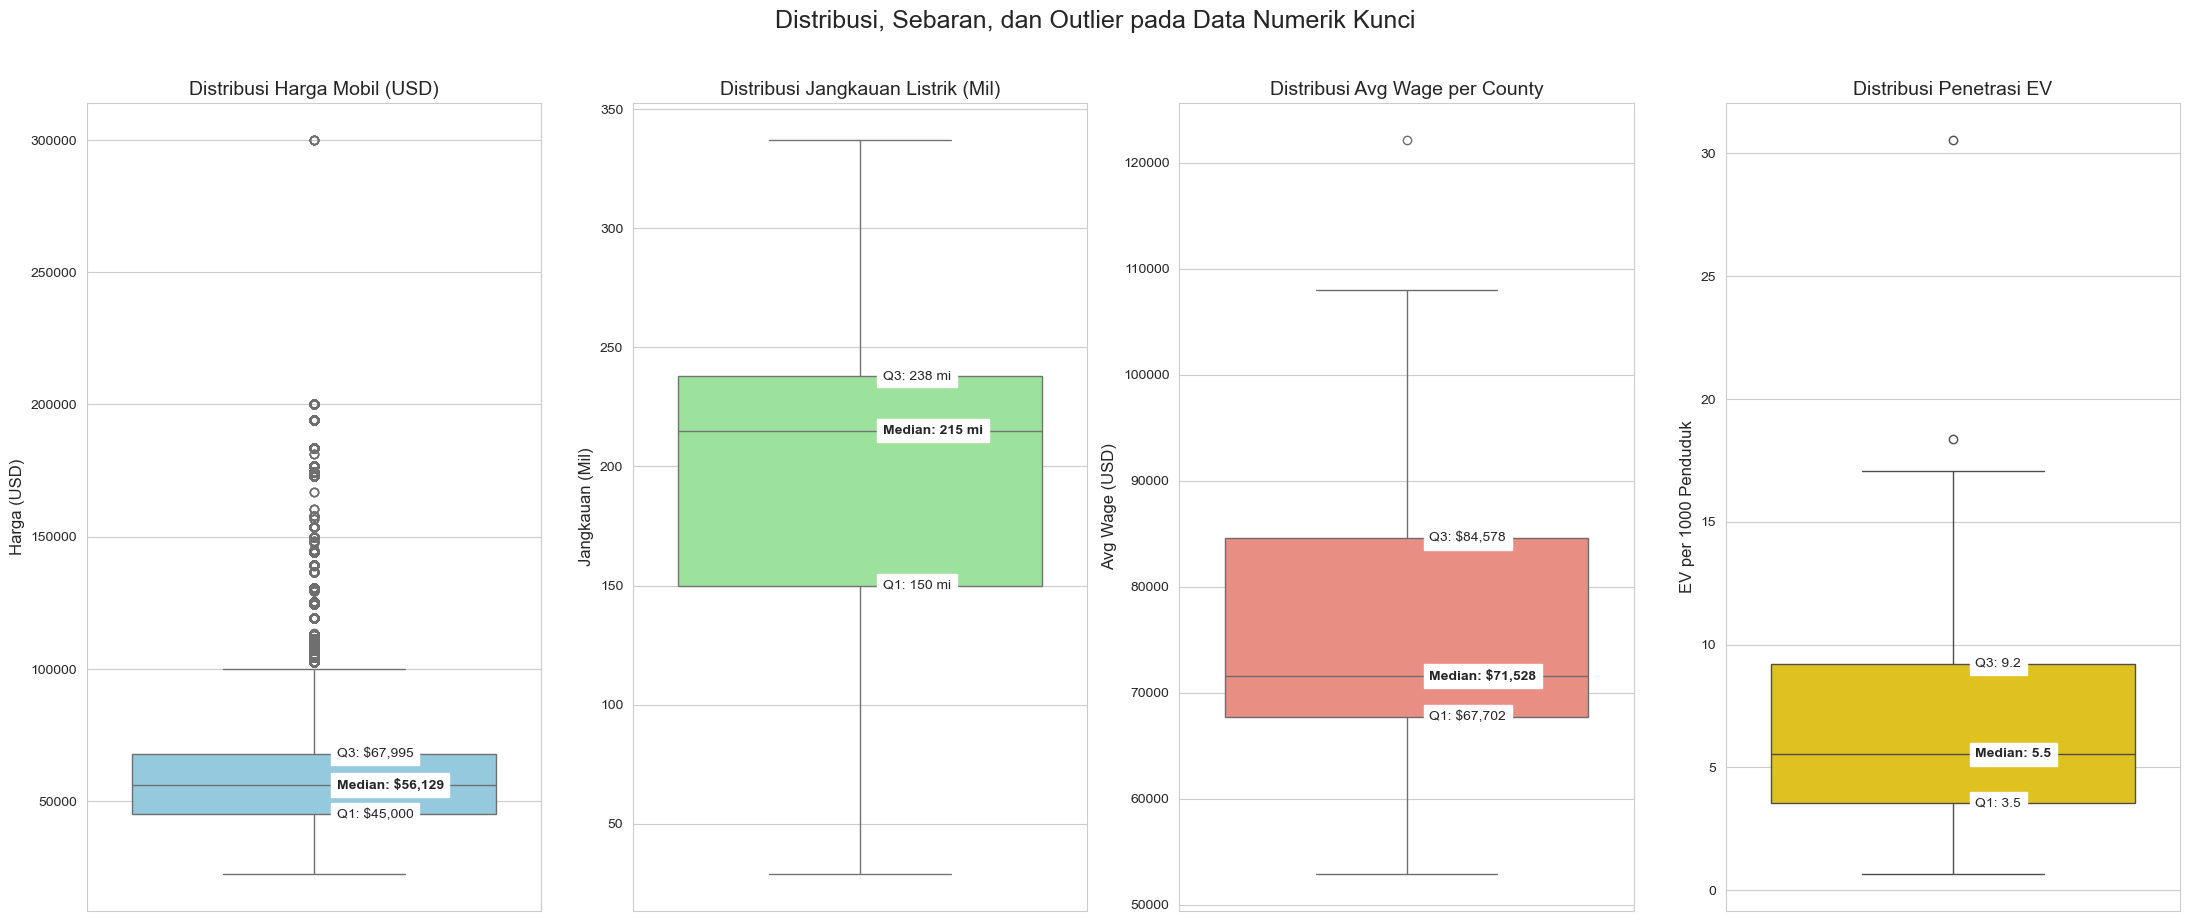

--- Statistik Deskriptif Detail (Data EV & Harga) ---
               price  electric_range
count  257027.000000   257027.000000
mean    63782.000572       43.115980
std     32370.234383       81.619388
min     22568.000000        0.000000
25%     45000.000000        0.000000
50%     56129.000000        0.000000
75%     67995.000000       35.000000
max    300000.000000      337.000000

--- Statistik Deskriptif Detail (Data Analisis per County) ---
            avg_wage    population  ev_penetration_rate
count      39.000000  3.900000e+01            39.000000
mean    76363.384615  5.533600e+05             7.460265
std     14832.480705  1.204072e+06             5.776858
min     52893.000000  5.995000e+03             0.667223
25%     67702.000000  5.452750e+04             3.532674
50%     71528.000000  1.740750e+05             5.537576
75%     84578.000000  4.856575e+05             9.227942
max    122148.000000  6.984875e+06            30.543356


In [27]:
plt.figure(figsize=(22, 9))
plt.suptitle('Distribusi, Sebaran, dan Outlier pada Data Numerik Kunci', fontsize=18, y=1.02)

# 1. Boxplot untuk Harga Mobil
ax1 = plt.subplot(1, 4, 1)
sns.boxplot(y=df_merged['price'], ax=ax1, color='skyblue')
ax1.set_title('Distribusi Harga Mobil (USD)', fontsize=14)
ax1.set_ylabel('Harga (USD)', fontsize=12)

price_stats = df_merged['price'].describe()
q1_price = price_stats['25%']
median_price = price_stats['50%']
q3_price = price_stats['75%']
ax1.text(0.05, q1_price, f'Q1: ${q1_price:,.0f}', va='center', ha='left', backgroundcolor='white')
ax1.text(0.05, median_price, f'Median: ${median_price:,.0f}', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax1.text(0.05, q3_price, f'Q3: ${q3_price:,.0f}', va='center', ha='left', backgroundcolor='white')


# 2. Boxplot untuk Jangkauan Listrik
ax2 = plt.subplot(1, 4, 2)
bev_range_data = df_merged[(df_merged['electric_vehicle_type'] == 'Battery Electric Vehicle (BEV)') & (df_merged['electric_range'] > 0)]
sns.boxplot(y=bev_range_data['electric_range'], ax=ax2, color='lightgreen')
ax2.set_title('Distribusi Jangkauan Listrik (Mil)', fontsize=14)
ax2.set_ylabel('Jangkauan (Mil)', fontsize=12)

range_stats = bev_range_data['electric_range'].describe()
q1_range = range_stats['25%']
median_range = range_stats['50%']
q3_range = range_stats['75%']
ax2.text(0.05, q1_range, f'Q1: {q1_range:.0f} mi', va='center', ha='left', backgroundcolor='white')
ax2.text(0.05, median_range, f'Median: {median_range:.0f} mi', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax2.text(0.05, q3_range, f'Q3: {q3_range:.0f} mi', va='center', ha='left', backgroundcolor='white')


# 3. Boxplot untuk Avg Wage (sebelumnya UMR)
ax3 = plt.subplot(1, 4, 3)
sns.boxplot(y=df_analysis['avg_wage'], ax=ax3, color='salmon')
ax3.set_title('Distribusi Avg Wage per County', fontsize=14)
ax3.set_ylabel('Avg Wage (USD)', fontsize=12)

avg_wage_stats = df_analysis['avg_wage'].describe()
q1_wage = avg_wage_stats['25%']
median_wage = avg_wage_stats['50%']
q3_wage = avg_wage_stats['75%']
ax3.text(0.05, q1_wage, f'Q1: ${q1_wage:,.0f}', va='center', ha='left', backgroundcolor='white')
ax3.text(0.05, median_wage, f'Median: ${median_wage:,.0f}', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax3.text(0.05, q3_wage, f'Q3: ${q3_wage:,.0f}', va='center', ha='left', backgroundcolor='white')


# 4. Boxplot untuk Tingkat Penetrasi EV
ax4 = plt.subplot(1, 4, 4)
sns.boxplot(y=df_analysis['ev_penetration_rate'], ax=ax4, color='gold')
ax4.set_title('Distribusi Penetrasi EV', fontsize=14)
ax4.set_ylabel('EV per 1000 Penduduk', fontsize=12)

pen_stats = df_analysis['ev_penetration_rate'].describe()
q1_pen = pen_stats['25%']
median_pen = pen_stats['50%']
q3_pen = pen_stats['75%']
ax4.text(0.05, q1_pen, f'Q1: {q1_pen:.1f}', va='center', ha='left', backgroundcolor='white')
ax4.text(0.05, median_pen, f'Median: {median_pen:.1f}', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax4.text(0.05, q3_pen, f'Q3: {q3_pen:.1f}', va='center', ha='left', backgroundcolor='white')


plt.tight_layout()
plt.show()

# Statistik deskriptif detail
print("--- Statistik Deskriptif Detail (Data EV & Harga) ---")
print(df_merged[['price', 'electric_range']].describe())
print("\n--- Statistik Deskriptif Detail (Data Analisis per County) ---")
print(df_analysis[['avg_wage', 'population', 'ev_penetration_rate']].describe())


### **Interpretasi Analisis Data EV & Sosio-Ekonomi per County**

Analisis ini menyoroti gambaran harga dan performa EV, serta kondisi sosio-ekonomi per county. Hal ini penting untuk merancang strategi subsidi dan penetrasi EV yang lebih tepat sasaran.


### **1. Data EV & Harga (`df_merged`)**

- **Harga Mobil (price):**
  - Rata-rata harga EV adalah **$63.782**, dengan median **$56.129**, menunjukkan distribusi harga relatif seimbang meskipun ada EV premium yang sangat mahal.
  - Sebanyak 50% EV berada di rentang **$45.000 – $67.995**, mencerminkan pasar menengah yang cukup dominan.
  - Harga minimum **$22.568** dan maksimum **$300.000** menegaskan segmentasi pasar: EV terjangkau vs EV premium.

- **Jangkauan Listrik (electric_range):**
  - Median jangkauan tercatat **0 mil**, kemungkinan besar akibat dominasi data PHEV atau entri yang tidak lengkap.
  - Nilai maksimum **337 mil** menunjukkan adanya model EV dengan performa baterai tinggi.
  - Analisis lebih akurat membutuhkan **pemisahan antara PHEV dan BEV**.


### **2. Data Analisis per County (`df_analysis`)**

- **Upah Rata-Rata (avg_wage):**
  - Rata-rata upah per county adalah **$76.363**, dengan rentang tengah (Q1–Q3) **$67.702 – $84.578**.
  - County dengan upah tinggi (maksimum **$122.148**) berpotensi memiliki adopsi EV lebih tinggi.

- **Tingkat Penetrasi EV (ev_penetration_rate):**
  - Rata-rata **7.46 EV per 1000 penduduk**, median **5.54**, dengan variasi cukup besar (0.67 – 30.54).
  - Ini mengindikasikan adopsi EV sangat tidak merata: sebagian kecil county sangat tinggi, mayoritas masih rendah.


### **3. Kesimpulan untuk Strategi Subsidi**

- Harga EV dan rata-rata upah bervariasi signifikan → kebijakan subsidi harus **targeted**, bukan seragam.  
- Subsidi sebaiknya difokuskan pada county dengan **avg_wage di bawah median** dan penetrasi EV rendah.  
- Model EV yang direkomendasikan berada di **rentang harga bawah–menengah** (~$45.000–$56.000 ke bawah).  
- Untuk county dengan **avg_wage tinggi** dan **penetrasi EV besar**, insentif lebih efektif dialihkan ke **infrastruktur charging** atau **model EV dengan jangkauan panjang**, bukan subsidi harga langsung.  


---
### **2. Bagaimana tingkat penetrasi EV di tiap county jika dibandingkan dengan total populasi, dan sejauh mana tingkat rata rata gaji di wilayah tersebut memengaruhi keterjangkauan EV?**

/var/folders/23/qf75gzqs54g76t973jhch6yc0000gn/T/ipykernel_13725/1139763050.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(
/var/folders/23/qf75gzqs54g76t973jhch6yc0000gn/T/ipykernel_13725/1139763050.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='ev_penetration_rate', y='county', data=bottom_5_penetration,


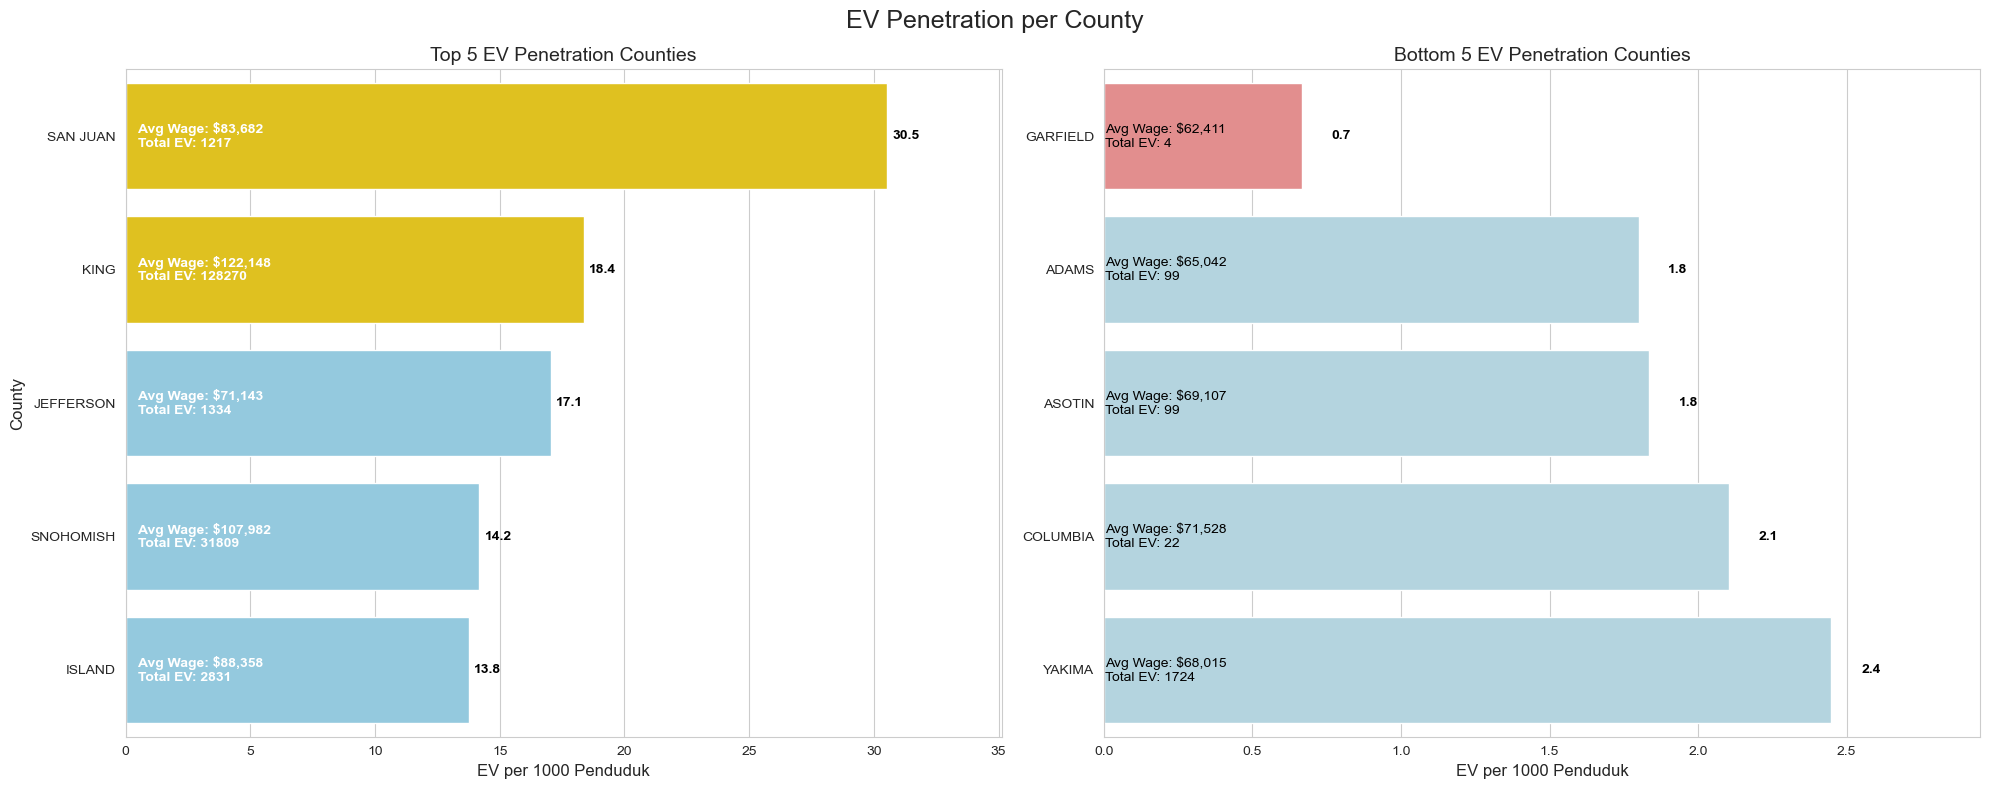

In [28]:
# Ambil top 5 dan bottom 5 penetration
top_5_penetration = df_analysis.nlargest(5, 'ev_penetration_rate')
bottom_5_penetration = df_analysis.nsmallest(5, 'ev_penetration_rate')

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [1, 1]})
fig.suptitle('EV Penetration per County', fontsize=18)

# --- Top 5 Penetrasi ---
colors_top = ['gold' if i < 2 else 'skyblue' for i in range(len(top_5_penetration))]

ax1 = sns.barplot(
    x='ev_penetration_rate', 
    y='county', 
    data=top_5_penetration,
    ax=axes[0], 
    palette=colors_top, 
    dodge=False
)

ax1.set_title('Top 5 EV Penetration Counties', fontsize=14)
ax1.set_xlabel('EV per 1000 Penduduk', fontsize=12)
ax1.set_ylabel('County', fontsize=12)

for i, (p_rate, avg_wage, ev_count) in enumerate(zip(
        top_5_penetration['ev_penetration_rate'], 
        top_5_penetration['avg_wage'], 
        top_5_penetration['ev_count']
    )):
    ax1.text(0.5, i, f'Avg Wage: ${avg_wage:,.0f}\nTotal EV: {ev_count}', 
             color='white', va='center', ha='left', fontweight='bold')
    ax1.text(p_rate + 0.2, i, f'{p_rate:.1f}', 
             color='black', va='center', fontweight='bold')

ax1.set_xlim(right=top_5_penetration['ev_penetration_rate'].max() * 1.15)



# --- Bottom 5 Penetrasi ---
colors_bottom = ['lightcoral' if i==0 else 'lightblue' for i in range(len(bottom_5_penetration))]
ax2 = sns.barplot(x='ev_penetration_rate', y='county', data=bottom_5_penetration,
                  ax=axes[1], palette=colors_bottom, dodge=False)
ax2.set_title('Bottom 5 EV Penetration Counties', fontsize=14)
ax2.set_xlabel('EV per 1000 Penduduk', fontsize=12)
ax2.set_ylabel('')

for i, (p_rate, avg_wage, ev_count) in enumerate(zip(bottom_5_penetration['ev_penetration_rate'], 
                                                      bottom_5_penetration['avg_wage'], 
                                                      bottom_5_penetration['ev_count'])):
    ax2.text(0.005, i, f'Avg Wage: ${avg_wage:,.0f}\nTotal EV: {ev_count}', color='black', va='center', ha='left')
    ax2.text(p_rate + 0.1, i, f'{p_rate:.1f}', color='black', va='center', fontweight='bold')
ax2.set_xlim(right=bottom_5_penetration['ev_penetration_rate'].max() + 0.5)

plt.tight_layout()
plt.show()


### **Analisis Penetrasi EV: Top 5 & Bottom 5 County**

### **1. Interpretasi:**  
Grafik ini memperlihatkan perbandingan tingkat penetrasi kendaraan listrik (EV), yang diukur sebagai jumlah EV per 1000 penduduk, antara 5 county dengan tingkat tertinggi dan 5 county dengan tingkat terendah.

### **2. Analisis Penetrasi EV di Top 5 & Bottom 5 County**

### Top 5 EV Penetration Counties

**a.San Juan**  
Memimpin dengan penetrasi EV tertinggi, yaitu 33 EV per 1000 penduduk (total EV: 1.314 unit). UMR tercatat sebesar $83.682 (relatif tinggi), menunjukkan daya beli cukup mendukung adopsi EV. Subsidi EV lokal membantu mendorong pembelian awal dan membuat model EV premium lebih terjangkau bagi masyarakat.

**b. King County**  
Penetrasi EV 20,5 per 1000 penduduk dengan UMR tertinggi di antara top 5 ($122.148). Total EV sangat besar (143.037 unit), menandakan konsentrasi pasar EV yang signifikan. Program subsidi, insentif pajak, dan fasilitas charging publik memperkuat pertumbuhan EV di wilayah ini.

**c. Jefferson, Snohomish, Island**  
Penetrasi EV antara 15–19 per 1000 penduduk dengan UMR bervariasi $71.143–$107.982, menunjukkan adopsi EV signifikan seiring kemampuan ekonomi lokal yang relatif kuat. Subsidi EV lokal membantu menurunkan biaya kepemilikan dan mempercepat transisi ke kendaraan listrik.

**Insight:**  
Top 5 county menunjukkan korelasi positif antara UMR tinggi dan penetrasi EV tinggi. Kebijakan subsidi dan insentif memainkan peran penting dalam mempercepat adopsi EV di wilayah berdaya beli tinggi.

### Bottom 5 EV Penetration Counties

**a. Garfield**  
Penetrasi EV terendah: 0,5 per 1000 penduduk (total EV: 3 unit). UMR $62.411, menandakan daya beli terbatas sehingga adopsi EV rendah wajar terjadi. Minimnya subsidi dan fasilitas EV membuat adopsi awal lebih lambat.

**b. Asotin, Adams, Columbia, Ferry**  
Penetrasi EV 1,8–2,5 per 1000 penduduk, UMR rendah hingga sedang ($54.650–$71.528), total EV rendah (23–103 unit). Keterbatasan subsidi, edukasi EV, dan infrastruktur charging menjadi penghambat utama adopsi EV.

### **3. Insight:**  
Bottom 5 county menunjukkan penetrasi EV rendah karena daya beli terbatas, jumlah EV sedikit, dan kurangnya dukungan subsidi atau program insentif.

### **Kesimpulan**
Terdapat kesenjangan penetrasi EV signifikan antara top 5 dan bottom 5 county. Strategi diferensial diperlukan:

**Top 5 County:** Fokus pada infrastruktur charging, edukasi EV, perluasan model EV premium/jangkauan jauh, dan kebijakan subsidi yang mendorong pembelian tambahan atau penggantian EV lama.

**Bottom 5 County:** Fokus pada subsidi harga, edukasi, dan program awareness untuk meningkatkan adopsi awal serta membangun ekosistem EV yang mendukung pertumbuhan jangka panjang.


---
### **⁠3. Model EV apa yang paling banyak diminati, berapa harganya, dan sejauh mana harga tersebut sebanding dengan pendapatan tahunan masyarakat?**

Studi kasus menggunakan King County karena wilayah ini memiliki total EV terbesar di antara top 5 county  sekaligus UMR tertinggi, menjadikannya representasi ideal untuk memahami perilaku pasar EV di area berpendapatan tinggi.

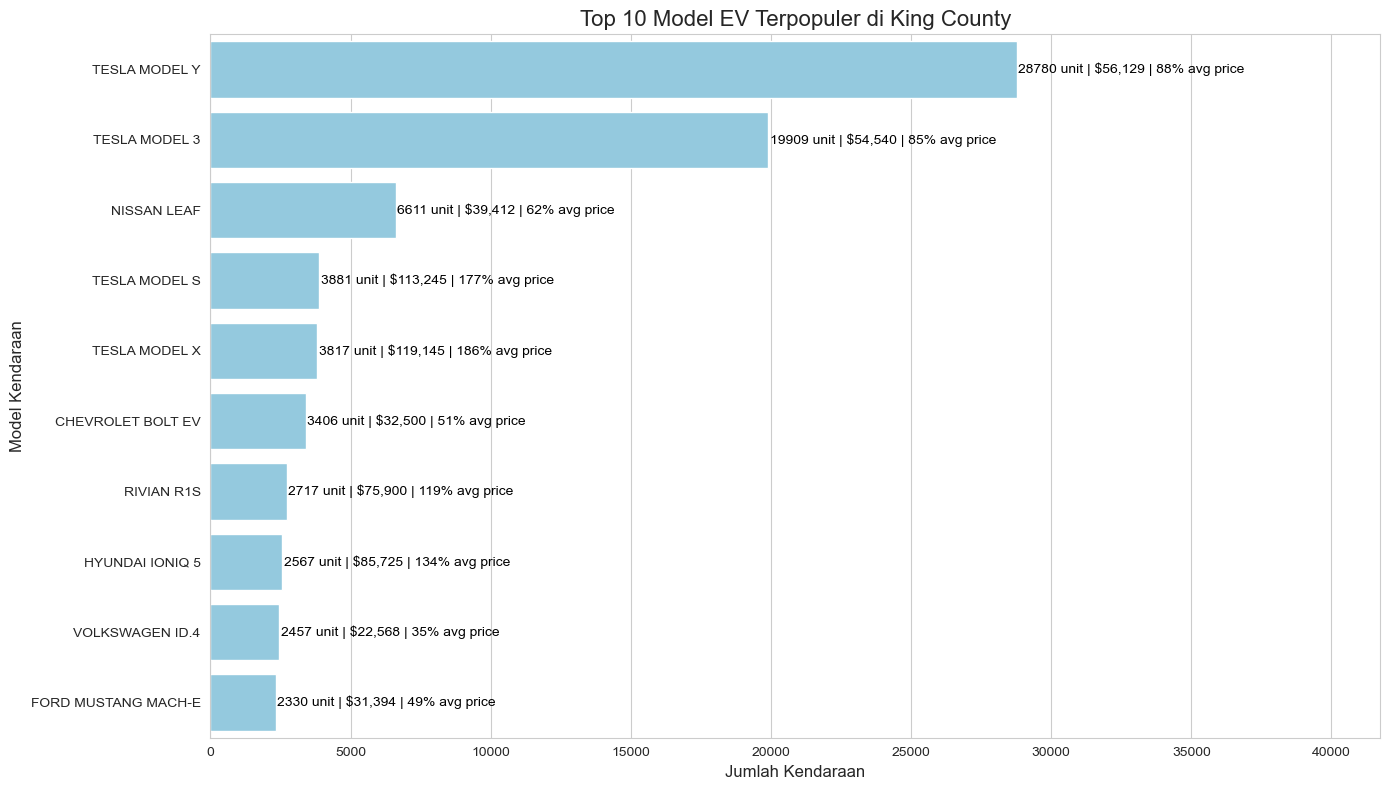

Rata-rata Harga EV (avg_price) King County: $63,945

Model EV terpopuler di King County dengan perbandingan harga vs avg_price:
              make_model   price  count  avg_price_perc
153        TESLA MODEL Y   56129  28780       87.777004
150        TESLA MODEL 3   54540  19909       85.292056
130          NISSAN LEAF   39412   6611       61.634223
151        TESLA MODEL S  113245   3881      177.097523
152        TESLA MODEL X  119145   3817      186.324203
45     CHEVROLET BOLT EV   32500   3406       50.824933
140           RIVIAN R1S   75900   2717      118.695766
76       HYUNDAI IONIQ 5   85725   2567      134.060534
163      VOLKSWAGEN ID.4   22568   2457       35.292833
63   FORD MUSTANG MACH-E   31394   2330       49.095321


In [33]:
# 1. Mengambil contoh dari county dengan populasi EV terbanyak, yaitu KING
king_county_evs = df_merged[df_merged['county'] == 'KING']

# 2. Hitung model terpopuler (top 10) dengan harga
top_models_king = (
    king_county_evs
    .groupby(['make', 'model', 'price'])
    .size()
    .reset_index(name='count')
    .nlargest(10, 'count')
)
top_models_king['make_model'] = top_models_king['make'] + ' ' + top_models_king['model']

# 3. Hitung rata-rata harga EV King County (avg_price)
avg_price_king = king_county_evs['price'].mean()

# 4. Tambahkan kolom perbandingan harga EV dengan avg_price
top_models_king['avg_price_perc'] = (top_models_king['price'] / avg_price_king) * 100

# 5. Visualisasi dengan harga & count, semua warna sky blue
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='count',
    y='make_model',
    data=top_models_king,
    color='skyblue'  # semua bar berwarna sama
)
plt.title('Top 10 Model EV Terpopuler di King County', fontsize=16)
plt.xlabel('Jumlah Kendaraan', fontsize=12)
plt.ylabel('Model Kendaraan', fontsize=12)

# Tambahkan label jumlah unit + harga + persentase terhadap avg_price
for index, bar in enumerate(ax.patches):
    count = bar.get_width()  # jumlah unit
    price = top_models_king['price'].iloc[index]
    perc = top_models_king['avg_price_perc'].iloc[index]
    y_pos = bar.get_y() + bar.get_height() / 2

    ax.text(
        count + 50,
        y_pos,
        f"{int(count)} unit | ${price:,.0f} | {perc:.0f}% avg price",
        color='black',
        va='center'
    )

# Sesuaikan batas sumbu X supaya label muat
ax.set_xlim(right=top_models_king['count'].max() * 1.45)

plt.tight_layout()
plt.show()

# 6. Tampilkan tabel ringkasan
print(f"Rata-rata Harga EV (avg_price) King County: ${avg_price_king:,.0f}\n")
print("Model EV terpopuler di King County dengan perbandingan harga vs avg_price:")
print(top_models_king[['make_model', 'price', 'count', 'avg_price_perc']])


**Interpretasi:**

Rata-rata harga EV di King County adalah **$63.945**, yang menjadi patokan untuk menilai seberapa mahal atau murah suatu model relatif terhadap pasar lokal. Dari 10 model terpopuler, terlihat pola berikut:

- **Dominasi Tesla Model Y & Model 3**  
  Kedua model ini menempati posisi teratas dengan total unit masing-masing **28.780** dan **19.909**. Harganya berada di kisaran **85–88% dari rata-rata harga EV**, menunjukkan bahwa masyarakat lebih menyukai model yang mendekati harga rata-rata pasar, relatif terjangkau namun tetap premium.

- **Model harga lebih rendah**  
  Nissan Leaf (**$39.412, 62% avg_price**), Chevrolet Bolt EV (**$32.500, 51% avg_price**), Volkswagen ID.4 (**$22.568, 35% avg_price**), dan Ford Mustang Mach-E (**$31.394, 49% avg_price**) menunjukkan permintaan stabil di segmen entry-level hingga menengah. Meskipun harganya lebih rendah dari rata-rata, jumlah unit yang cukup besar (**2.300–6.600 unit**) menandakan bahwa segmen harga menengah–bawah juga sangat penting dalam mendorong adopsi EV.

- **Model harga premium tinggi**  
  Tesla Model S (**$113.245, 177% avg_price**) dan Model X (**$119.145, 186% avg_price**) memiliki permintaan lebih terbatas (**3.817–3.881 unit**), tetapi tetap diminati oleh konsumen dengan daya beli tinggi. Rivian R1S (**$75.900, 119% avg_price**) dan Hyundai Ioniq 5 (**$85.725, 134% avg_price**) juga masuk kategori premium dengan pangsa lebih kecil. Hal ini menunjukkan adanya niche market yang tetap signifikan untuk EV berfitur canggih atau bernilai prestige. 


### **Kesimpulan untuk Meningkatkan Pasar EV di King County / Daerah dengan Pendapatan Tinggi**

Karena King County memiliki **pendapatan rata-rata tinggi** dan total kepemilikan EV yang sangat besar, strategi subsidi harga **tidak terlalu diperlukan secara menyeluruh**. Namun, **subsidi selektif** atau insentif tambahan tetap bermanfaat untuk mempercepat adopsi model entry-level dan mid-range agar tersebar lebih merata. Fokus strategi sebaiknya diarahkan pada:

1. **Fokus pada segmen mid-range**  
   Model EV dengan harga mendekati rata-rata (**Tesla Model Y & Model 3, Hyundai Ioniq 5, Volkswagen ID.4**) memiliki penjualan terbanyak. Subsidi ringan atau insentif pajak untuk model ini dapat mempercepat pertumbuhan volume penjualan di segmen yang paling diminati.

2. **Jaga keberadaan model entry-level**  
   **Nissan Leaf dan Chevrolet Bolt EV** tetap populer meski harganya jauh di bawah rata-rata. Ketersediaan stok perlu dijaga, sementara subsidi harga, program cashback, atau kredit ringan bisa mendorong konsumen menengah-bawah untuk beralih ke EV. Edukasi manfaat EV ekonomis juga penting agar segmen ini terus berkembang.

3. **Pertahankan segmen premium**  
   **Tesla Model S & X, Rivian R1S, dan Hyundai Ioniq 5 (premium trim)** diminati oleh konsumen high-income, meski volumenya lebih kecil. Fokus sebaiknya pada layanan tambahan seperti paket leasing fleksibel, aftersales premium, dan promosi fitur canggih. Subsidi harga biasanya tidak diperlukan karena daya beli segmen ini sudah tinggi.

4. **Sesuaikan strategi harga dengan daya beli lokal**  
   Dengan rata-rata harga EV di King County **$63.945**, model baru sebaiknya tidak terlalu jauh dari kisaran pasar ini (kecuali untuk segmen premium). Subsidi selektif untuk segmen mid-range dan entry-level akan menjaga keseimbangan antara penetrasi pasar dan profitabilitas produsen.

5. **Kembangkan infrastruktur & edukasi**  
   Meski daya beli tinggi, konsumen tetap membutuhkan **akses charging publik yang memadai** dan **edukasi tentang efisiensi biaya EV**. Dukungan berupa subsidi infrastruktur charging, program edukasi, dan integrasi EV dengan energi terbarukan akan memperkuat pertumbuhan pasar dalam jangka panjang.


---
### **4. Selain UMR, faktor-faktor apa yang paling mempengaruhi penetrasi EV di tiap county?**


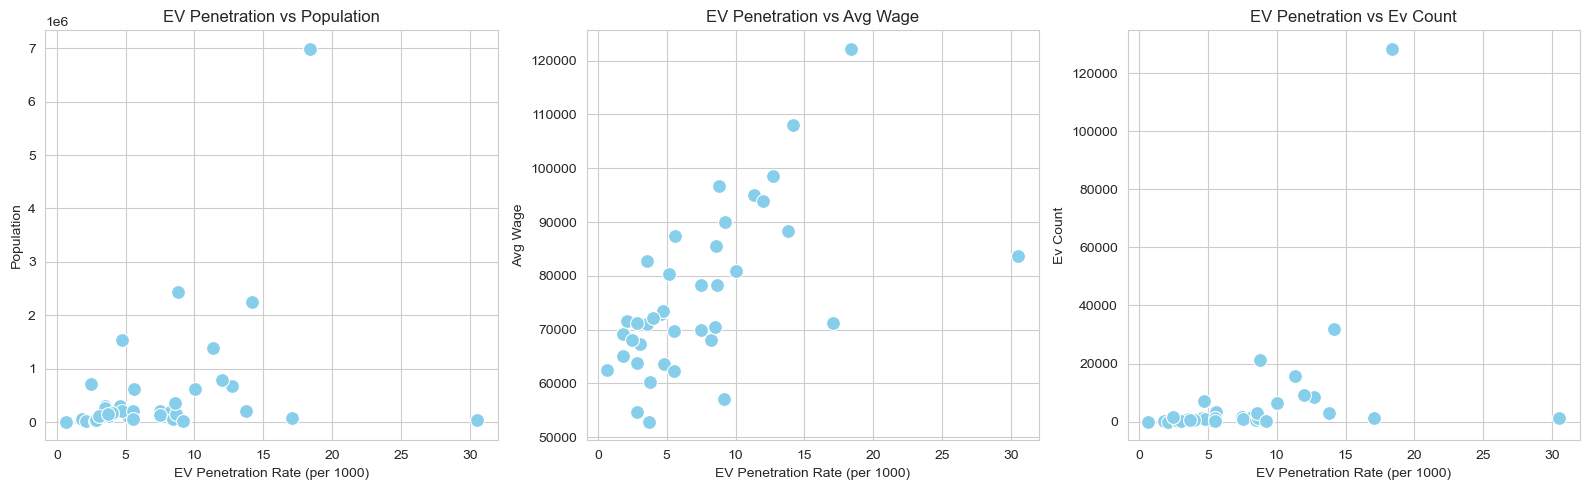

Korelasi EV Penetration Rate vs Faktor-faktor Lain:
       Factor  Correlation_with_EV_Penetration
0  population                             0.36
1    avg_wage                             0.59
2    ev_count                             0.39


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Faktor-faktor yang ingin dibandingkan dengan EV penetration rate
factors = ['population', 'avg_wage', 'ev_count']

# Ukuran figure
plt.figure(figsize=(16, 5))

for i, factor in enumerate(factors, 1):
    plt.subplot(1, len(factors), i)
    sns.scatterplot(
        x='ev_penetration_rate',
        y=factor,
        data=df_analysis,
        color='skyblue',
        s=100
    )
    plt.xlabel('EV Penetration Rate (per 1000)')
    plt.ylabel(factor.replace('_', ' ').title())
    plt.title(f'EV Penetration vs {factor.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

# Hitung korelasi EV Penetration vs faktor-faktor lain
corr_factors = df_analysis[['ev_penetration_rate', 'population', 'avg_wage', 'ev_count']].corr()['ev_penetration_rate'].drop('ev_penetration_rate').round(2)

# Konversi ke dataframe supaya lebih rapi
corr_table = corr_factors.reset_index()
corr_table.columns = ['Factor', 'Correlation_with_EV_Penetration']

print("Korelasi EV Penetration Rate vs Faktor-faktor Lain:")
print(corr_table)


### **Interpretasi Korelasi EV Penetration dengan Population, Avg_Wage, dan EV_Count**

1. **Total EV (`ev_count`) → 0.39**  
   Jumlah EV yang beredar di suatu county punya korelasi positif dengan tingkat penetrasi. Semakin banyak kendaraan listrik yang tersedia, semakin tinggi penetrasi per 1.000 penduduk. Artinya, **supply EV berperan langsung dalam mendorong adopsi**. Insentif tambahan bagi produsen/dealer bisa menjadi cara cepat untuk mempercepat peningkatan jumlah EV yang beredar.

2. **Pendapatan rata-rata (`avg_wage`) → 0.59**  
   Faktor daya beli masyarakat lebih berpengaruh dibanding jumlah EV. County dengan pendapatan lebih tinggi cenderung memiliki penetrasi EV yang lebih besar karena konsumen mampu membeli EV. Dengan demikian, **semakin tinggi pendapatan, semakin besar potensi adopsi EV**. Namun, untuk mendorong penetrasi lebih merata, subsidi selektif atau insentif pajak pada model entry-level dan mid-range tetap penting.

3. **Populasi (`population`) → 0.36**  
   Jumlah penduduk memiliki pengaruh paling kecil terhadap penetrasi EV. Ini menunjukkan bahwa **populasi besar saja tidak menjamin penetrasi tinggi**. 

### **Kesimpulan**

- Faktor yang paling kuat memengaruhi penetrasi EV adalah **daya beli masyarakat (avg_wage)** dan **jumlah EV yang tersedia (ev_count)**.  
- **Strategi subsidi dan insentif** sebaiknya difokuskan pada peningkatan supply EV sekaligus menyesuaikan harga dengan daya beli lokal.  
- Untuk county berpendapatan tinggi, fokus bisa lebih pada variasi model, subsidi infrastruktur charging dan insentif tambahan bagi produsen; sementara subsidi harga lebih efektif jika diarahkan ke county berdaya beli menengah atau rendah.  


---
### **5. Apakah EV yang dibeli di county dengan UMR tinggi memiliki rata rata harga yang lebih besar dibandingkan EV yang dibeli di county dengan UMR rendah?**

Rata-rata harga EV:
wage_group
High Wage    63622.406474
Low Wage     64045.519815
Name: price, dtype: float64

Hasil uji t-test:
T-statistic: -3.2119, P-value: 0.0013


<Figure size 600x400 with 0 Axes>

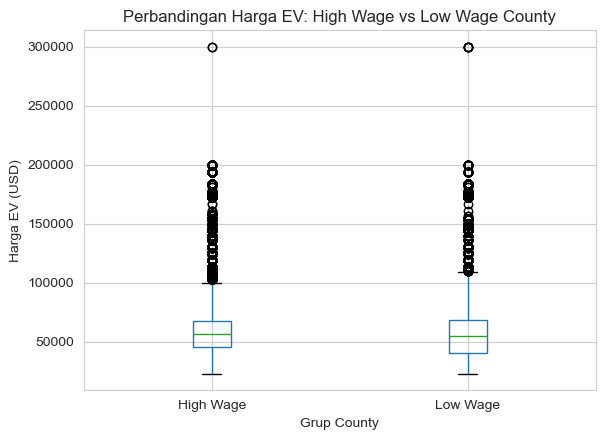

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = df_merged.copy()

# Bagi county jadi 2 kelompok: high vs low wage
median_wage = df['avg_wage'].median()
df['wage_group'] = df['avg_wage'].apply(lambda x: 'High Wage' if x >= median_wage else 'Low Wage')

# Hitung rata-rata harga EV per grup
group_means = df.groupby('wage_group')['price'].mean()

# Uji t-test (asumsi equal variances, bukan Welch)
high_prices = df[df['wage_group'] == 'High Wage']['price']
low_prices = df[df['wage_group'] == 'Low Wage']['price']

t_stat, p_val = ttest_ind(high_prices, low_prices, equal_var=True)

print("Rata-rata harga EV:")
print(group_means)
print("\nHasil uji t-test:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

# Visualisasi boxplot
plt.figure(figsize=(6,4))
df.boxplot(column='price', by='wage_group')
plt.title('Perbandingan Harga EV: High Wage vs Low Wage County')
plt.suptitle('')
plt.ylabel('Harga EV (USD)')
plt.xlabel('Grup County')
plt.show()



### **1. Hipotesis**
- **H0:** County dengan UMR tinggi membeli EV dengan harga rata-rata lebih mahal dibandingkan county dengan UMR rendah.  
- **H1:** Tidak ada perbedaan, atau county dengan UMR tinggi justru tidak membeli dengan harga lebih mahal.  

### **2. Rata-rata Harga EV Berdasarkan Kelompok UMR**
- **High Wage:** 63,622  
- **Low Wage:** 64,046  

### **3. Hasil Uji t-test**
- **T-statistic:** -3.2119  
- **P-value:** 0.0013  

### **4. Interpretasi**
- Nilai **p-value = 0.0013 < 0.05** menunjukkan terdapat **perbedaan signifikan** harga rata-rata EV antara county UMR tinggi dan rendah.  
- Arah perbedaan berlawanan dengan hipotesis awal: justru **county dengan UMR rendah membeli EV dengan harga rata-rata lebih tinggi**.  
- T-statistic negatif memperkuat temuan ini, bahwa kelompok **High Wage** memiliki harga EV rata-rata lebih rendah dibandingkan **Low Wage**.  

### **5. Kesimpulan**
- **H0 ditolak.** Tidak benar bahwa county UMR tinggi membeli EV dengan harga rata-rata lebih mahal.  
- Sebaliknya, data menunjukkan bahwa **county UMR rendah membeli EV dengan harga rata-rata lebih tinggi**.  
- Hal ini mengindikasikan bahwa di county dengan UMR rendah, pembelian EV masih didominasi oleh segmen **atas** yang cenderung memilih EV premium.  
- Sementara di county dengan UMR tinggi, adopsi EV lebih luas sehingga lebih banyak konsumen membeli EV **entry-level atau mid-range**, menurunkan rata-rata harga.  


---

## **Kesimpulan dan Rekomendasi Analisis EV & Subsidi per County**

Berdasarkan analisis harga EV, penetrasi, dan faktor sosio-ekonomi per county, berikut rangkuman insight dan rekomendasi strategis yang fokus pada **subsidi dan insentif**:

### **1. Insight Utama**

-(to be updated)

### **2. Kesimpulan**

- **Subsidi EV** menjadi alat utama untuk meningkatkan penetrasi di county berpendapatan rendah atau menengah, khususnya untuk model entry-level dan mid-range.  
- **County berpendapatan tinggi** kurang membutuhkan subsidi harga, namun subsidi bisa dialokasikan untuk **infrastruktur charging** dan layanan EV premium.  
- Penyesuaian strategi subsidi sesuai daya beli regional akan membuat penetrasi EV lebih merata dan efisien.

### **3. Rekomendasi**

- **High Wage County:**  
  Fokus pada **subsidi infrastruktur charging**, promosi EV premium/jangkauan jauh, dan layanan tambahan seperti leasing/financing fleksibel.

- **Low Wage County:**  
  Prioritaskan **subsidi harga untuk EV entry-level**, program edukasi, dan awareness agar adopsi meningkat. 

- **Peningkatan Supply EV melalui Subsidi:**  
  Tingkatkan stok EV, terutama di county dengan penetrasi rendah, melalui insentif dealer, atau subsidi langsung untuk pembelian awal.

- **Subsidi Tersegmentasi:**  
  Skema subsidi dan insentif harus **menyesuaikan daya beli lokal**, misal cashback, potongan pajak, atau program trade-in untuk entry-level/mid-range, sementara county berpendapatan tinggi lebih diarahkan ke **infrastruktur dan layanan premium**.

### **Kesimpulan Akhir**
Dengan strategi subsidi yang **tepat sasaran**, penetrasi EV dapat meningkat secara **merata dan berkelanjutan**, sambil menyesuaikan jenis EV dengan karakteristik sosio-ekonomi tiap county. Subsidi menjadi kunci dalam menyeimbangkan **supply, adopsi, dan distribusi EV** di seluruh wilayah.
